## PREDICTING HEART DISEASES USING MACHINE LEARNING
This note book uses scikit learn and few data science python libraries to predict the 
possibility of a heart disease

1. PROBLEM DEFINITION
2. DATA PROCESSING
3. EVALUATION 
4. FEATURES
5. MODELLING
6. EXPERIMETATION

# PROBLEM :-
TO DO A BINARY CLASSIFICATION ON THE POSSIBIILITY OF A HEART DISEASE BASED ON 
FEW IMPORTANT FEATURES IN THE DATA SET

# DATA THE CSV FILE IS BASED ON THE UCI MACHINE LEARNING REPOSITORY THE SIMILAR DATA SET CAN ALSO BE FOUND ON KAGGLE
 

# EVALUATION 
IF THE MODEL IS >=95% ACCURATE THEN THIS MODEL CAN BE EXPORTED AND USED FOR OTHER APPLICATIONS

# FEATURES

    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
    condition: 0 = no disease, 1 = disease


In [1]:
# IMPORTING ALL THE PYTHON LIBRARIES

#EDA LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

#SCIKIT LEARN MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#MODELS FOR EVALUATING THE MODEL
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score , RocCurveDisplay


# LOADING THE DATA

In [2]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# data exploration 

1. What kind of queation are we trying to answer
2. What kind of data are present
3. what are the types of data present
4. what are the important features present
5. how to deal with outliers

In [3]:
# different types of entries in the target column
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

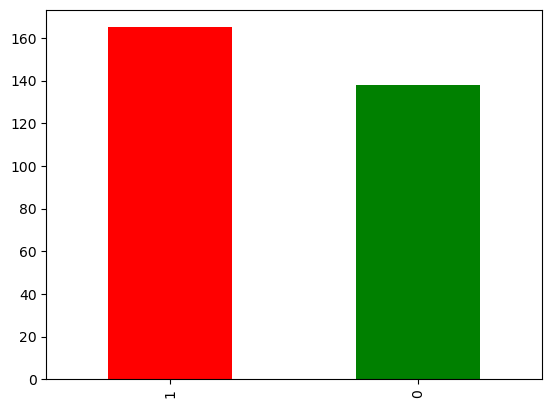

In [4]:
df['target'].value_counts().plot(kind='bar',color=['red','green'])

In [5]:
# checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# COMPARING THE COLUMNS
THIS HELPS US TO TRY TO GUESS WHICH FEATURES ARE IMPORTWNT IN PREDECTION THE RESULT

In [6]:
# comparing the target and gender
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [7]:
df.sex.value_counts() #(1=male 0=female)

1    207
0     96
Name: sex, dtype: int64

<Axes: xlabel='target'>

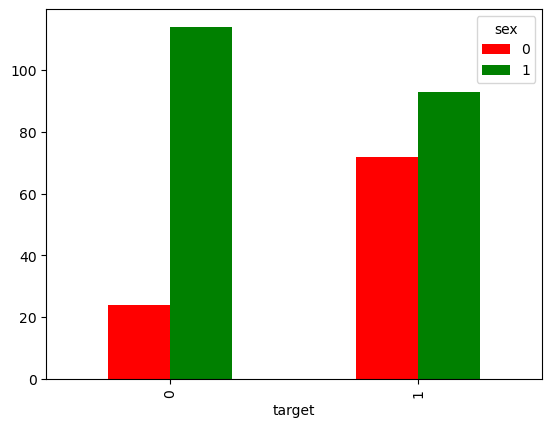

In [8]:
# plotting the cross tab result
pd.crosstab(df.target , df.sex).plot(kind='bar',color=['red','green'] )

In [9]:
# COMPARING THE RESTING BLOOD SUGAR , MAX HEART RATE(thalach) AND AGE 

Text(0, 0.5, 'MAX HEART RATE')

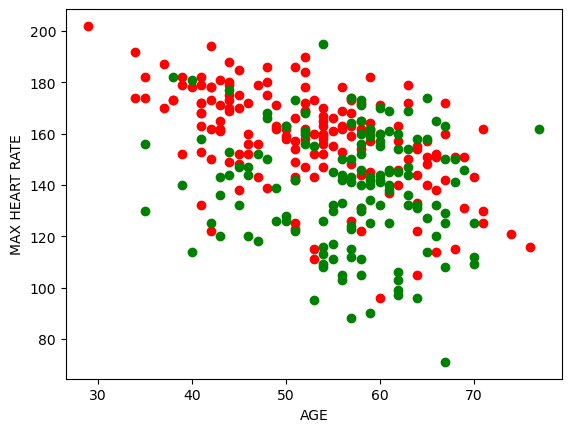

In [10]:
plt.figure()

#scatter plot for the positive target values
plt.scatter(df.age[df.target == 1] , df.thalach[df.target == 1] , c='red')
#plotting for -ve results
plt.scatter(df.age[df.target == 0] , df.thalach[df.target == 0] , c='green')
plt.xlabel('AGE')
plt.ylabel('MAX HEART RATE')

Text(0, 0.5, 'RESTING BLOOD PRESSURE')

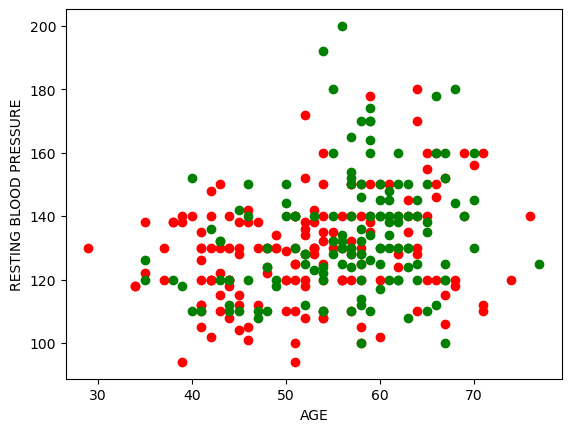

In [11]:
plt.scatter(df.age[df.target == 1] , df.trestbps[df.target == 1] , c='red')
plt.scatter(df.age[df.target == 0] , df.trestbps[df.target == 0] , c='green')
plt.xlabel('AGE')
plt.ylabel('RESTING BLOOD PRESSURE')

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# COMPARING THE CHEST PAIN COLUMN WITH THE TARGET
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0.5, 1.0, 'HEART DISEASE BASED ON THE TYPES OF CHEST PAIN')

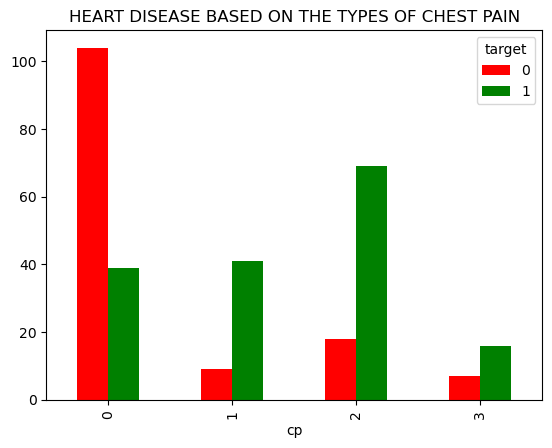

In [14]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['red','green'] )
plt.title("HEART DISEASE BASED ON THE TYPES OF CHEST PAIN")

In [15]:
# BUILDING A CORELATION MATRIX
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


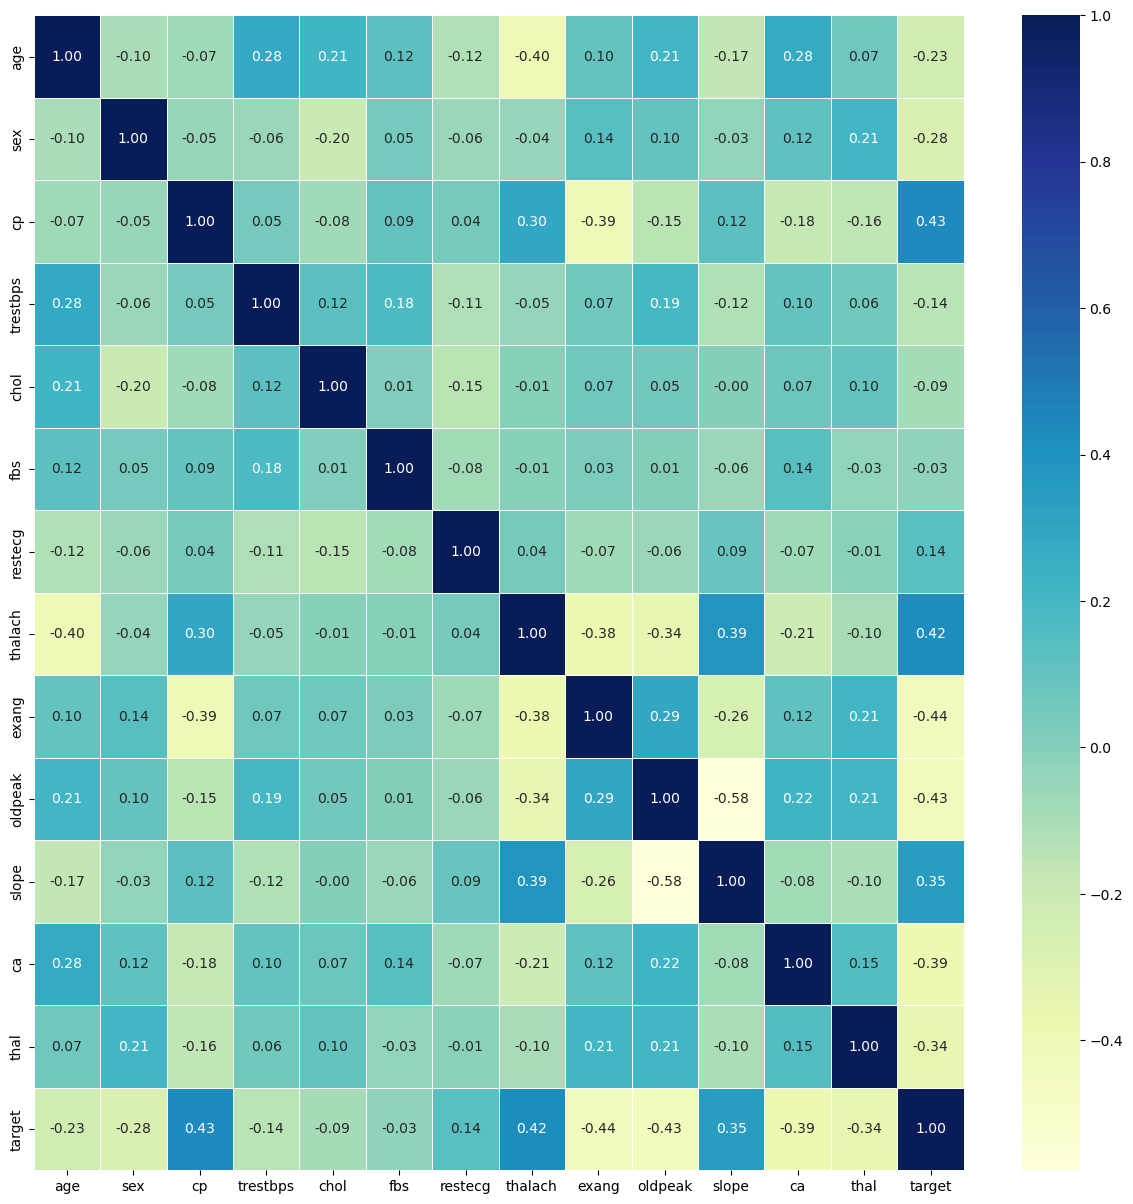

In [16]:
#plotting the corelation matrix as a heat map
corr_mat = df.corr()
fig , ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_mat , annot=True , linewidths=0.5 , fmt='.2f' , cmap='YlGnBu')

## MODELLING

In [17]:
# spliting data into X , y
X = df.drop("target" , axis=1)
y = df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
np.random.seed(42)
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size=0.2)

# TRYING DIFFERENT MODELS
(1)RANDOM FOREST CLASSIFIERD
(2)KNN
(3)LOGISTIC REGRESSION

In [20]:
models = {'Logestic Regression':LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

# using this dictionary to fit data into each model
def fit(models , X_train , X_test , y_train , y_test):
    np.random.seed(42)
    model_score={}
    
    for name , algo in models.items() :
        algo.fit(X_train , y_train)
        model_score[name] = algo.score(X_test , y_test)
    
    return model_score

In [21]:
results= fit(models , X_train , X_test , y_train , y_test)
results

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logestic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## MODEL COMPARISION

<Axes: >

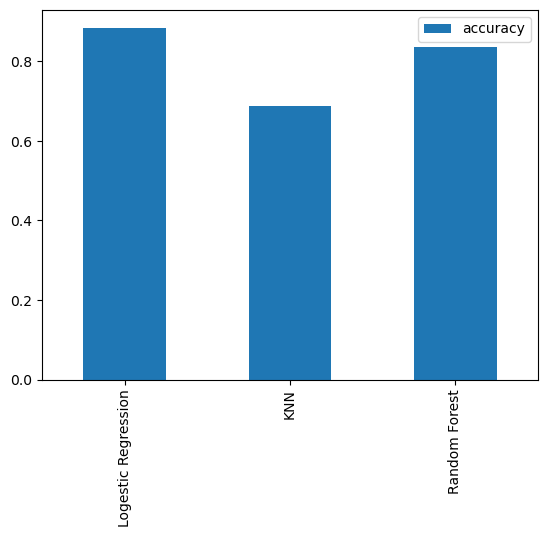

In [22]:
model_compare = pd.DataFrame(results , index=['accuracy'] )
model_compare.T.plot.bar()

## POINTS TO CONSIDER FOR EVALUATING THE ABOVE CLASSIFICATION MODEL
* CONFUSION MATRIX
* RECALL
* F1 SCORE
* PRECISSION
* ACCURACY(DEFAULT:SCORE)
* CROSS VALIDATION

FOR IMPROVING THE MODEL HYPERPARAMETER TUNING CAN BE USED

 ## HYPERPARAMETER TUNING

In [23]:
# Tuning KNN

train_score=[]
test_score = []
#Creating a list of different parameters
neighbors = range(1,21)

# model instance
knn = KNeighborsClassifier()

#for loop for trying different parameters
for i in neighbors:
    knn.set_params(n_neighbors=i  ,algorithm='brute')
    
    #fit the neighbor
    knn.fit(X_train , y_train)
    
    #updating the list
    train_score.append(knn.score(X_train , y_train))
    test_score.append(knn.score(X_test , y_test))

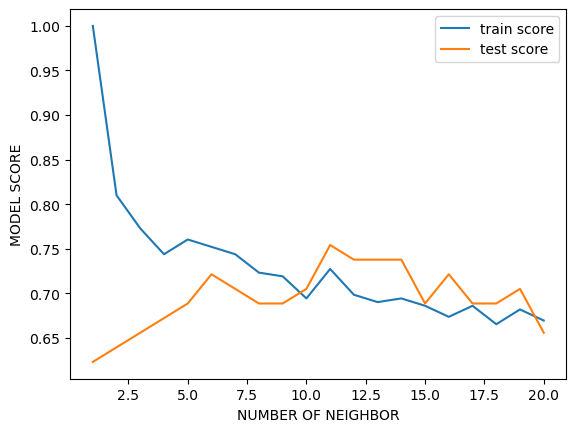

In [24]:
plt.plot(neighbors,train_score , label='train score')
plt.plot(neighbors,test_score , label='test score')
plt.xlabel("NUMBER OF NEIGHBOR")
plt.ylabel("MODEL SCORE")
plt.legend()

## HYPERTUNING USING RANDOMISED SEARCH CV

In [25]:
# TUNING LOGISTIC REGRESSION

# creating a hyper parameter grid
lg_grid = {"C" : np.logspace(-4,4,20),
       "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag']}

#TUNING RANDOM FOREST CLASSIFIER

#creating a grid for random forest
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None , 3 , 5 , 10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

In [26]:
np.random.seed(42)

rs_log_rig = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = lg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#fitting the model for the tuned logistic regression model
rs_log_rig.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag']},
                   verbose=True)

In [27]:
rs_log_rig.best_params_

{'solver': 'lbfgs', 'C': 0.615848211066026}

In [28]:
rs_log_rig.score(X_test , y_test)

0.8852459016393442

In [29]:
#Tuning the random forest classifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#fitting the model for the tuned random forest model
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
#finding the best combination of parametrs
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [31]:
rs_rf.score(X_test , y_test)

0.8688524590163934

## USING GRID SEARCH CV WITH THE 2 MODELS

In [32]:
#Grid search dies a exaustive search on all the given parameters rather than 
#randomly searching for combinations of parameters

In [33]:
# GRID SEARCH FOR LOGISTIC REGRESSION

lg_grid = {"C" : np.logspace(-4,4,30),
       "solver":['lbfgs', 'liblinear', 
                 'newton-cg', 'newton-cholesky', 
                 'sag']}

grid_search_log_reg = GridSearchCV(LogisticRegression(),
                                  param_grid=lg_grid,
                                  cv=5,
                                  verbose=True)

# Fitting the grid search model
grid_search_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_mode

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lear

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_mode

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_mode

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_mode

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_mode

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_mode

D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Pranav\ML_BASICS\PROJECT1\env\Lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag']},
             verbose=True)

In [34]:
grid_search_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
# Evaluating the grid search model
grid_search_log_reg.score(X_test,y_test)

0.8852459016393442

In [36]:
# GRIG SEARCH FOR RANDOM FOREST
rf_grid = {"n_estimators":np.arange(10,100,50),
          "max_depth":[None , 3 , 5 , 10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

grid_search_rf = GridSearchCV(RandomForestClassifier(),
                                  param_grid=rf_grid,
                                  cv=5,
                                  verbose=True)

# Fitting the grid search model
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 60])},
             verbose=True)

In [37]:
grid_search_rf.score(X_test,y_test)

0.8360655737704918

## MODEL REPORT FOR THE TUNED LOGISTIC REGRESSION MODEL
* ROC CURVE
* CONFUSION MATRIX
* CLASSIFICATION REPORT
* PRECISSION
* RECALL
* F1-SCORE

In [38]:
# predictions
y_preds = grid_search_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

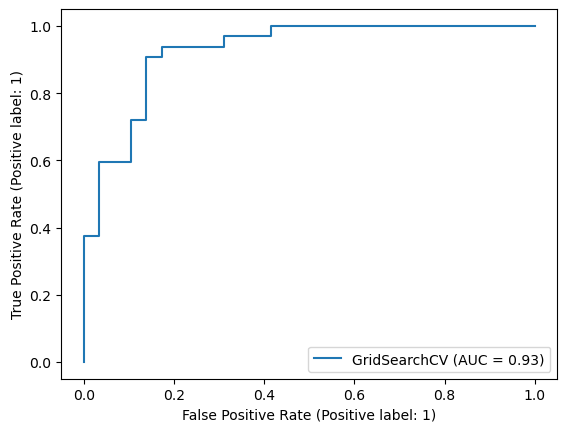

In [39]:
RocCurveDisplay.from_estimator(grid_search_log_reg , X_test , y_test)

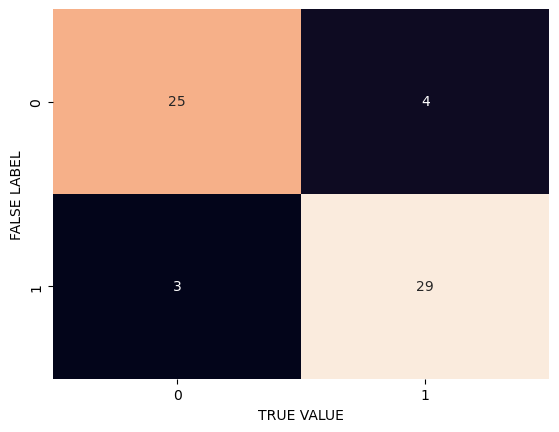

In [40]:
def plot_confusion(y_test , y_preds):
    fig , ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True , cbar=False)
    plt.xlabel('TRUE VALUE')
    plt.ylabel('FALSE LABEL')

plot_confusion(y_test , y_preds)

In [41]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [42]:
# CALCUATING EVALUATION METRICS USING CROSS VALIDATION
grid_search_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [46]:
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [48]:
cv_precission = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precission

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [49]:
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [53]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [54]:
cross_validated_metrix = pd.DataFrame({"Accuracy":cv_acc,
                                      "Precission":cv_precission,
                                      "Recall":cv_recall,
                                       "F1":cv_f1
                                      })
cross_validated_metrix

,Accuracy,Precission,Recall,F1
0,0.819672,0.775000,0.939394,0.849315
1,0.901639,0.885714,0.939394,0.911765
2,0.868852,0.857143,0.909091,0.882353
3,0.883333,0.861111,0.939394,0.898551
4,0.750000,0.725000,0.878788,0.794521


<Axes: title={'center': 'cross_validated_metrix '}>

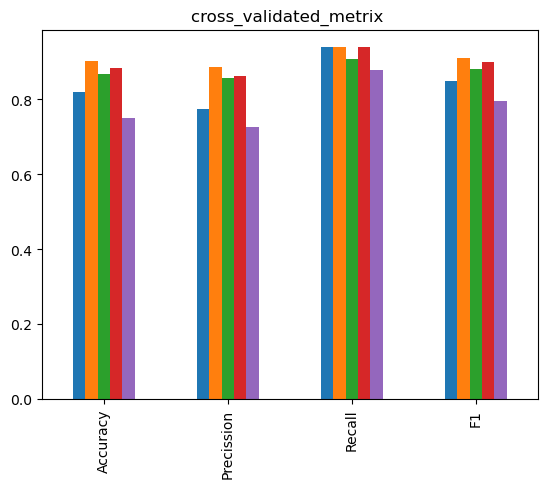

In [58]:
cross_validated_metrix.T.plot.bar(title='cross_validated_metrix ',legend=False)

## FEATURE IMPORTANCE
IT IS HILIGHTING THE FEATURES THE ARE THE MOST SIGNIFICANT IN PREDICTING THE RESULT

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
#FITTING AN INSTANCE OF THE MODEL
clf = LogisticRegression(C=0.20433597178569418 , solver='liblinear' )
clf.fit(X_train , y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [61]:
clf.coef_
# this indecates the impact of each of the columns to the target column

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [62]:
# Matching the coef's of features to colums
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<Axes: title={'center': 'FEATURE IMPORTANCE'}>

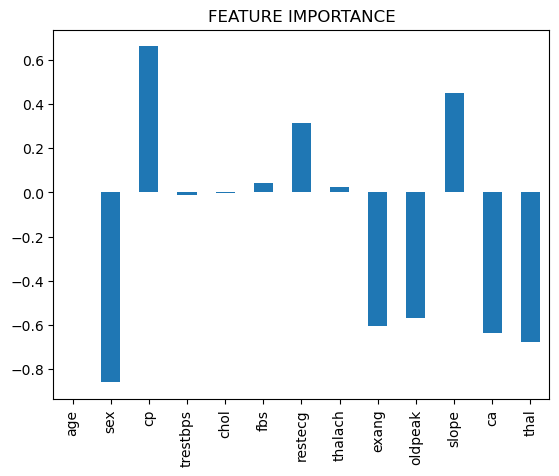

In [64]:
feature_df = pd.DataFrame(feature_dict , index=[0])
feature_df.T.plot.bar(title='FEATURE IMPORTANCE',legend=False)